In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from codes import utils as cutil

sns.set(context="paper", style="white")

out_home = cutil.RESULTS / "other" / "sims"


## settings
bn = 0.08
sn = 0
gn = 0


dirname_sim = f"betaNoise_{bn}_gammaNoise_{gn}_sigmaNoise_{sn}"
reg_dir = out_home / "regression" / dirname_sim
proj_dir = out_home / "projection" / dirname_sim

plot_dir = proj_dir / "plots"
plot_dir.mkdir(exist_ok=True)

## Showing re-projection performance

In [2]:
true = xr.open_dataset(proj_dir / "true.nc")
sir = xr.open_dataset(proj_dir / "pred_sir.nc")
seir = xr.open_dataset(proj_dir / "pred_seir.nc")
true.load()
sir.load()
seir.load()

sir["cum_cases_steady_state"] = 1 - (sir.gamma_deterministic / sir.beta_deterministic.isel(t=-1))
seir["cum_cases_steady_state"] = 1 - (seir.gamma_deterministic / seir.beta_deterministic.isel(t=-1))
true["cum_cases_steady_state"] = 1 - (true.gamma / 24 / true.beta_deterministic.isel(t=-1))

full_ds = {
    "true": true,
    "sir": sir,
    "seir": seir
}

# add on cum observed cases
for k,v in full_ds.items():
    v["IR"] = v.I + v.R

In [3]:
means = {k:v.mean(dim="sample") for k,v in full_ds.items()}
p95 = {k:v.quantile(.95, dim="sample") for k,v in full_ds.items()}
p50 = {k:v.quantile(.5, dim="sample") for k,v in full_ds.items()}
p05 = {k:v.quantile(.05, dim="sample") for k,v in full_ds.items()}

qs = {k: xr.concat([p05[k], p50[k], p95[k]], dim="quantile") for k in p50.keys()}

In [8]:
for s_proj in qs["seir"].sigma_proj.values:
    for L in qs["seir"].LHS.values:
        this_ds = xr.concat(
            [
                qs["true"].drop("E"), 
                qs["sir"].sel(LHS=L), 
                qs["seir"].sel(LHS=L).sel(sigma_proj=s_proj).drop("E")
            ], 
            dim="model",
        )
        this_ds["model"] = ["true", "sir", "seir"]
        for p in qs["seir"].pop.values:
            
            g = xr.plot.FacetGrid(this_ds.sel(pop=p), col="gamma", row="sigma")
            colors = "rgb"
            def plot_ranges(data):
                for mx,m in enumerate(this_ds.model):
                    # get this particular model
                    this_data = data[mx]

                    # get diff in policy vs. no policy
                    this_data = this_data[:,0] - this_data[:,1]

                    # plot quantile diffs
                    if m.item()=="true":
                        alpha=1
                    else:
                        alpha=.5

                    if m.item()=="seir":
                        label = f"SEIR ($\gamma_{{proj}} = {s_proj:.2f}$)"
                    elif m.item()=="sir":
                        label = "SIR"
                    else:
                        label = "true"
                    plt.fill_between(this_ds.t.values, this_data[0], this_data[-1], label=label, color=colors[mx], alpha=alpha)
            g.map(plot_ranges, "IR")
            g.axes.flat[0].legend(loc="upper left")
            g.set_xlabels("")
            g.set_titles("$\{coord}$ = {value}")
            g.fig.suptitle(f"LHS: {L}, Pop: {p:.0g}", va="bottom", y=0.99)
            g.fig.savefig(plot_dir / f"IR_timeseries_pop_{p}_LHS_{L}_sigmaProj_{s_proj}.pdf", dpi=300)
            plt.clf()

/home/bolliger/miniconda3/envs/gpl-covid/lib/python3.7/site-packages/xarray/plot/facetgrid.py:171: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  subplot_kw=subplot_kws,
/home/bolliger/miniconda3/envs/gpl-covid/lib/python3.7/site-packages/xarray/plot/facetgrid.py:171: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  subplot_kw=subplot_kws,
/home/bolliger/miniconda3/envs/gpl-covid/lib/python3.7/site-packages/xarray/plot/facetgrid.py:171: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

## Steady state values

In [55]:
LHS_to_plot = ["I", "IR"]

this_true = means["true"].sel(with_policy=0) - means["true"].sel(with_policy=1)
this_true = this_true.cum_cases_steady_state

seirs = []
for s_proj in means["seir"].sigma_proj:
    this_pred_seir = means["seir"].sel(with_policy=0) - means["seir"].sel(with_policy=1)
    this_pred_seir = this_pred_seir.cum_cases_steady_state.sel(sigma_proj=s_proj).drop("sigma_proj")
    seirs.append(this_pred_seir)

this_pred_sir = means["sir"].sel(with_policy=0) - means["sir"].sel(with_policy=1)
this_pred_sir = this_pred_sir.cum_cases_steady_state

plot_ds = xr.concat([this_true, this_pred_sir] + seirs, dim="model").mean("pop")
plot_ds["model"] = ["true", "SIR"] + [f"SEIR_{i:.2f}" for i in means["seir"].sigma_proj.values]

plot_ds = plot_ds.sel(LHS=LHS_to_plot)
plot_df = plot_ds.to_dataframe().reset_index(drop=False)

In [69]:
(seir.beta_deterministic.isel(sigma=0, sigma_proj=0, t=-1) / sir.beta_deterministic.isel(sigma=0), t=-1).min()

SyntaxError: invalid syntax (<ipython-input-69-d25533f4798b>, line 1)

In [67]:
seir.gamma_deterministic.isel(sigma=0) / sir.gamma_deterministic.isel(sigma=0)

<xarray.DataArray 'gamma_deterministic' (with_policy: 2, pop: 3, sample: 1000, gamma: 3)>
array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]])
Coordinates:
  * sample   (sample) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
  * pop      (pop) int64 10000000 30000000 100000000
    sigma    float64 0.2
  * gamma    (gamma) float64 0.05 0.2 0.33
Dimensions without coordinates: with_policy

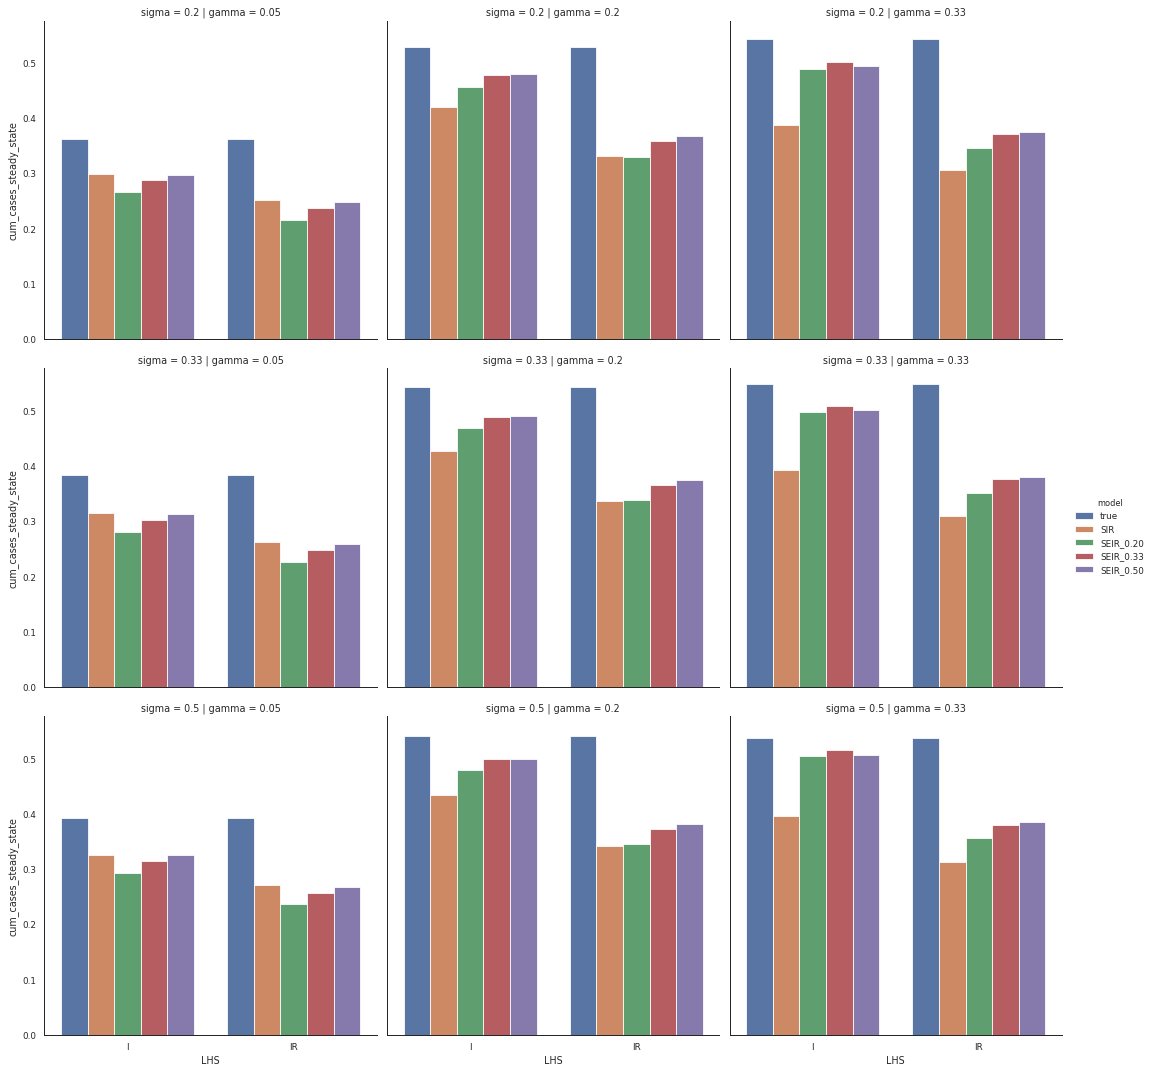

In [57]:
sns.catplot(data=plot_df, row="sigma", col="gamma", x="LHS", hue="model", y="cum_cases_steady_state", kind="bar")

In [38]:
plot_df

sigma_proj  cum_cases_steady_state
model gamma sigma LHS                                    
true  0.05  0.20  I           0.2                0.362963
                  EI          0.2                0.362963
                  IR          0.2                0.362963
                  EIR         0.2                0.362963
            0.33  I           0.2                0.383982
...                           ...                     ...
SIR   0.33  0.33  EIR         0.2                0.342649
            0.50  I           0.2                0.396291
                  EI          0.2                0.416522
                  IR          0.2                0.313892
                  EIR         0.2                0.337317

[108 rows x 2 columns]

In [33]:
plot_ds.isel(gamma=0, sigma=0).mean("pop").cum_cases_steady_state.to_dataframe()

sigma_proj  gamma  sigma  cum_cases_steady_state
model LHS                                                  
true  I           0.2   0.05    0.2                0.362963
      EI          0.2   0.05    0.2                0.362963
      IR          0.2   0.05    0.2                0.362963
      EIR         0.2   0.05    0.2                0.362963
SEIR  I           0.2   0.05    0.2                0.265732
      EI          0.2   0.05    0.2                0.369668
      IR          0.2   0.05    0.2                0.215652
      EIR         0.2   0.05    0.2                0.301637
SIR   I           0.2   0.05    0.2                0.299606
      EI          0.2   0.05    0.2                0.394420
      IR          0.2   0.05    0.2                0.251908
      EIR         0.2   0.05    0.2                0.332952

In [36]:
plot_ds.mean("pop").to_dataframe()

sigma_proj  cum_cases_steady_state
LHS gamma model sigma                                    
I   0.05  true  0.20          0.2                0.362963
                0.33          0.2                0.383982
                0.50          0.2                0.392817
          SEIR  0.20          0.2                0.265732
                0.33          0.2                0.281343
...                           ...                     ...
EIR 0.33  SEIR  0.33          0.2                0.406373
                0.50          0.2                0.396869
          SIR   0.20          0.2                0.351943
                0.33          0.2                0.342649
                0.50          0.2                0.337317

[108 rows x 2 columns]

AttributeError: 'numpy.ndarray' object has no attribute 'to_dataframe'

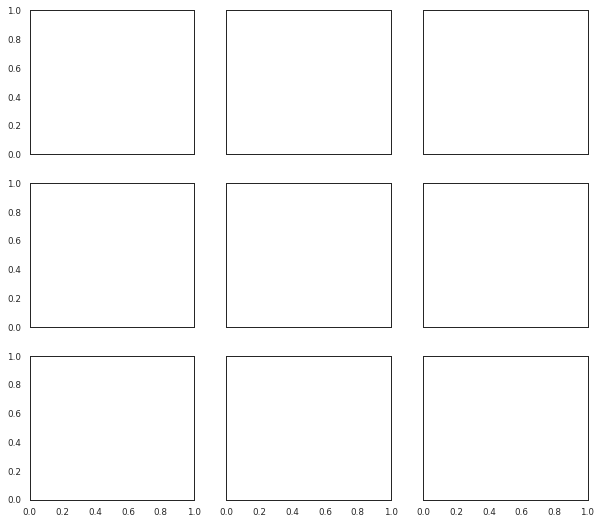

In [34]:
g = xr.plot.FacetGrid(plot_ds.mean("pop"), row="gamma", col="sigma")
def plot_hists(data):
    df = data.squeeze().to_dataframe()
    sns.barplot(x="LHS", hue="model", y="cum_cases_steady_state")
g.map(plot_hists, "cum_cases_steady_state")

In [ ]:
g

AttributeError: 'Rectangle' object has no property 'row'

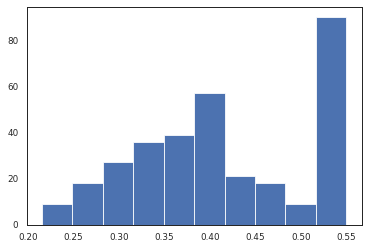

In [26]:
plot_ds.plot.hist(row="gamma", col="sigma", hue="LHS")

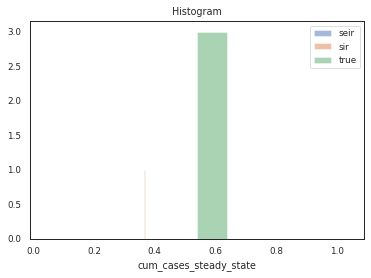

In [14]:
this_pred_seir.mean("LHS").plot.hist(label="seir", alpha=.5)
this_pred_sir.mean("LHS").plot.hist(label="sir", alpha=.5)
this_true.plot.hist(label="true", alpha=.5)
plt.legend()

In [15]:
sir.cum_cases_steady_state

<xarray.DataArray 'cum_cases_steady_state' (with_policy: 2, pop: 3, sample: 1000, gamma: 3, sigma: 3, LHS: 4)>
array([[[[[[0.88896821, 0.88843665, 0.88915773, 0.88851987],
           [0.88886249, 0.88819088, 0.88905639, 0.88831301],
           [0.88884574, 0.88853026, 0.8890703 , 0.88867522]],

          [[0.66622627, 0.66511731, 0.66734071, 0.66561317],
           [0.66640497, 0.66526071, 0.66765785, 0.66600075],
           [0.66638003, 0.66586527, 0.66784791, 0.66677766]],

          [[0.54730949, 0.5463559 , 0.54892515, 0.54703841],
           [0.54749417, 0.54646913, 0.5493301 , 0.54750829],
           [0.54747365, 0.54703818, 0.54964123, 0.5483518 ]]],


         [[[       nan,        nan,        nan,        nan],
           [       nan,        nan,        nan,        nan],
           [0.88730418, 0.887836  , 0.88778845, 0.88807186]],

          [[       nan,        nan,        nan,        nan],
           [       nan,        nan,        nan,        nan],
           [0.66316248, 0.66443484, 0.66628539, 0.6659335 ]],

          [[       nan,        nan,        nan,        nan],
           [       nan,        nan,        nan,        nan],
           [0.54409242, 0.54554965, 0.54867083, 0.54772533]]],


         [[[0.8889482 , 0.88917681, 0.88908354, 0.88921341],
           [0.88875543, 0.88955121, 0.88891945, 0.88958537],
           [0.88838261, 0.88890146, 0.88860766, 0.88899444]],

          [[0.6666973 , 0.66705551, 0.66754304, 0.66729731],
           [0.66632254, 0.66775357, 0.66736069, 0.66800759],
           [0.6655212 , 0.66651458, 0.66697202, 0.66713686]],

          [[0.54788729, 0.54818616, 0.5491061 , 0.54854674],
           [0.54751761, 0.54885842, 0.54902197, 0.54926478],
           [0.54665938, 0.54763469, 0.54878395, 0.5485698 ]]],


         ...,


         [[[0.88884776, 0.88966272, 0.88909091, 0.88971346],
           [0.88879111, 0.88977634, 0.88898872, 0.8898161 ],
           [0.88743205, 0.8881492 , 0.88780306, 0.88831091]],

          [[       nan,        nan,        nan,        nan],
           [0.66658148, 0.6681257 , 0.66778371, 0.66843688],
           [0.66363982, 0.66498786, 0.6659752 , 0.66603706]],

          [[       nan,        nan,        nan,        nan],
           [0.54794198, 0.54918908, 0.54963607, 0.54970033],
           [0.54477045, 0.5460656 , 0.54813417, 0.54761061]]],


         [[[0.88880469, 0.88741522, 0.889164  , 0.8875885 ],
           [0.88885565, 0.88805305, 0.88929082, 0.88829174],
           [0.88860665, 0.88781405, 0.88907279, 0.88812442]],

          [[       nan,        nan,        nan,        nan],
           [0.66568283, 0.66262111, 0.66816401, 0.66421362],
           [0.66575674, 0.66451572, 0.6687775 , 0.66642788]],

          [[       nan,        nan,        nan,        nan],
           [0.54670001, 0.54390475, 0.55029596, 0.54610529],
           [0.54673353, 0.54571727, 0.55115837, 0.54842907]]],


         [[[0.8893171 , 0.88916314, 0.88950598, 0.88923179],
           [0.88936836, 0.88918705, 0.88954551, 0.88927623],
           [0.88956595, 0.88922294, 0.88975286, 0.88934781]],

          [[0.66669184, 0.66598156, 0.66787746, 0.66645528],
           [0.66747186, 0.66718526, 0.66863094, 0.66775142],
           [0.66789559, 0.66726299, 0.66914732, 0.66807308]],

          [[0.54779552, 0.54721528, 0.54952317, 0.54787719],
           [0.54862559, 0.54838784, 0.55033906, 0.54920877],
           [0.5490731 , 0.54847433, 0.55095426, 0.54966505]]]],



        [[[[0.88896848, 0.88843708, 0.88915798, 0.88852029],
           [0.88886282, 0.88819138, 0.8890567 , 0.88831348],
           [0.8888461 , 0.88853075, 0.88907064, 0.88867569]],

          [[0.66622734, 0.66511886, 0.66734163, 0.66561462],
           [0.66640616, 0.66526235, 0.66765888, 0.66600224],
           [0.66638138, 0.66586699, 0.66784907, 0.6667792 ]],

          [[0.54731102, 0.54635799, 0.54892636, 0.54704031],
           [0.54749594, 0.54647143, 0.54933155, 0.54751034],
           [0.54747567, 0.54704071, 0

In [14]:
true["cum_cases_steady_state"]

<xarray.DataArray 'cum_cases_steady_state' (gamma: 3, with_policy: 2, pop: 3, sigma: 3)>
array([[[[ 0.11111111, -0.20547945, -0.48148148],
         [ 0.11111111, -0.20547945, -0.48148148],
         [ 0.11111111, -0.20547945, -0.48148148]],

        [[ 0.88888889,  0.88888889,  0.88888889],
         [ 0.88888889,  0.88888889,  0.88888889],
         [ 0.88888889,  0.88888889,  0.88888889]]],


       [[[-1.66666667, -2.61643836, -3.44444444],
         [-1.66666667, -2.61643836, -3.44444444],
         [-1.66666667, -2.61643836, -3.44444444]],

        [[ 0.66666667,  0.66666667,  0.66666667],
         [ 0.66666667,  0.66666667,  0.66666667],
         [ 0.66666667,  0.66666667,  0.66666667]]],


       [[[-2.61643836, -3.90448489, -5.02739726],
         [-2.61643836, -3.90448489, -5.02739726],
         [-2.61643836, -3.90448489, -5.02739726]],

        [[ 0.54794521,  0.54794521,  0.54794521],
         [ 0.54794521,  0.54794521,  0.54794521],
         [ 0.54794521,  0.54794521,  0.54794521]]]])
Coordinates:
  * gamma    (gamma) float64 0.05 0.2 0.33
  * pop      (pop) int64 10000000 30000000 100000000
  * sigma    (sigma) float64 0.2 0.33 0.5
Dimensions without coordinates: with_policy

In [19]:
reg_res.coefficient.sum(dim=["reg_lag", "policy"])

<xarray.DataArray 'coefficient' (pop: 3, gamma: 3, sigma: 3, sample: 1000, LHS: 4)>
array([[[[[-0.32788128, -0.34828612, -0.31235915, -0.3348627 ],
          [ 0.        ,  0.        ,  0.        ,  0.        ],
          [-0.3252102 , -0.34752792, -0.31034192, -0.33462608],
          ...,
          [-0.32629344, -0.35413116, -0.31040582, -0.33966872],
          [-0.3247574 , -0.34425044, -0.309766  , -0.3304773 ],
          [-0.32506603, -0.34890693, -0.3097285 , -0.33517554]],

         [[-0.33213764, -0.34623933, -0.31644106, -0.33155894],
          [ 0.        ,  0.        ,  0.        ,  0.        ],
          [-0.32815996, -0.3472212 , -0.31337798, -0.33313364],
          ...,
          [-0.33129504, -0.35351747, -0.31487295, -0.33750165],
          [-0.3299244 , -0.34553933, -0.31492788, -0.3305651 ],
          [-0.32980406, -0.34739143, -0.3141839 , -0.33237386]],

         [[-0.33569553, -0.34703958, -0.3200336 , -0.33171123],
          [-0.32628024, -0.34165025, -0.31143218, -0.32640836],
          [-0.3295626 , -0.34349948, -0.31503853, -0.3290664 ],
          ...,
          [-0.32993367, -0.34641513, -0.31397504, -0.33010173],
          [-0.3327977 , -0.34395832, -0.31773192, -0.32850033],
          [-0.33420312, -0.3466264 , -0.31847602, -0.33105054]]],


        [[[-0.33280322, -0.34684068, -0.29853636, -0.32046986],
          [ 0.        ,  0.        ,  0.        ,  0.        ],
          [-0.33134872, -0.34751302, -0.29817113, -0.32159516],
          ...,
          [ 0.        ,  0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ,  0.        ],
          [-0.33063406, -0.34709835, -0.29627824, -0.31964606]],

         [[-0.3364837 , -0.34736073, -0.30219346, -0.31747976],
          [ 0.        ,  0.        ,  0.        ,  0.        ],
          [-0.3330975 , -0.34815234, -0.30025476, -0.31874156],
          ...,
          [-0.3361073 , -0.35302752, -0.30036247, -0.32050055],
          [-0.33327666, -0.34263942, -0.30052853, -0.31260616],
          [-0.33526713, -0.3490825 , -0.300533  , -0.31786925]],

         [[-0.33938086, -0.34879744, -0.30528805, -0.31685066],
          [-0.33070886, -0.34391922, -0.29923323, -0.31230226],
          [-0.33383217, -0.34556693, -0.30172443, -0.3147809 ],
          ...,
          [-0.33425692, -0.34788898, -0.30011293, -0.31419465],
          [-0.33652055, -0.34628132, -0.3043996 , -0.31438518],
          [-0.3389272 , -0.3492372 , -0.30408084, -0.31614795]]],


        [[[-0.33528873, -0.34649473, -0.2945197 , -0.31669348],
          [ 0.        ,  0.        ,  0.        ,  0.        ],
          [-0.33426404, -0.34721124, -0.29458845, -0.31774637],
          ...,
          [ 0.        ,  0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ,  0.        ],
          [-0.33350128, -0.34682405, -0.29252785, -0.31571445]],

         [[-0.33805782, -0.34711662, -0.29744405, -0.31295574],
          [ 0.        ,  0.        ,  0.        ,  0.        ],
          [-0.33530983, -0.34790623, -0.2961548 , -0.31404924],
          ...,
          [-0.3380897 , -0.35192993, -0.29578   , -0.31484807],
          [-0.33509696, -0.3429924 , -0.29655933, -0.3088371 ],
          [-0.33719537, -0.348785  , -0.29594165, -0.31298554]],

         [[-0.34034353, -0.34852213, -0.3001086 , -0.31169134],
          [-0.3323554 , -0.34417245, -0.2957034 , -0.30785352],
          [-0.33551598, -0.34570134, -0.29740775, -0.30997932],
          ...,
          [-0.3357657 , -0.3475643 , -0.2957431 , -0.30889866],
          [-0.3376267 , -0.34634703, -0.3001135 , -0.30982038],
          [-0.3401929 , -0.34912014, -0.2989586 , -0.3108506 ]]]],



       [[[[-0.3278726 , -0.34827632, -0.31235254, -0.33485532],
          [ 0.        ,  0.        ,  0.        ,  0.        ],
          [-0.32520008, -0.3475163 , -0.31033403, -0.3346171 ],
          ...,
          [-0.32627544, -0.35411024, -0.31039155, -0.3396523 ],
          [-0.32473987, -0.3

In [21]:
lambda_p = reg_res.Intercept - reg_res.coefficient.sum(dim=["reg_lag", "policy"])
lambda_np = reg_res.Intercept